<a href="https://colab.research.google.com/github/champsleague/Deep-Learning/blob/main/Lesson2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from fastai.vision.all import *
try: import fastkaggle
except ModuleNotFoundError:
    !pip install -Uq fastkaggle
from fastkaggle import *

In [2]:
comp = 'muffin-vs-chihuahua-image-classification'
path = setup_comp(comp, install='fastai "timm>=0.6.2.dev0"')

In [3]:
display(path)

Path('../input/muffin-vs-chihuahua-image-classification')

In [4]:
# check what's in the path
!ls {path}

test  train


In [5]:
# seperate the paths
train_path = path/'train'
validation_path = path/'test'

In [6]:
# get's every images in the path
files = get_image_files(train_path)

In [7]:
# to see whats the first location of file
image = PILImage.create(files[0])
print(image)
print(files[0])

PILImage mode=RGB size=1200x1800
../input/muffin-vs-chihuahua-image-classification/train/muffin/img_4_879.jpg


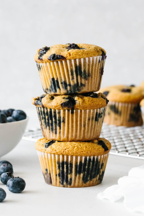

In [8]:
# image check
image.to_thumb(216,216)

In [9]:
# dataLoader
dls = ImageDataLoaders.from_folder(
    train_path,
    valid_pct=0.2,
    seed=42,
    item_tfms=Resize(192,method='squish')
)

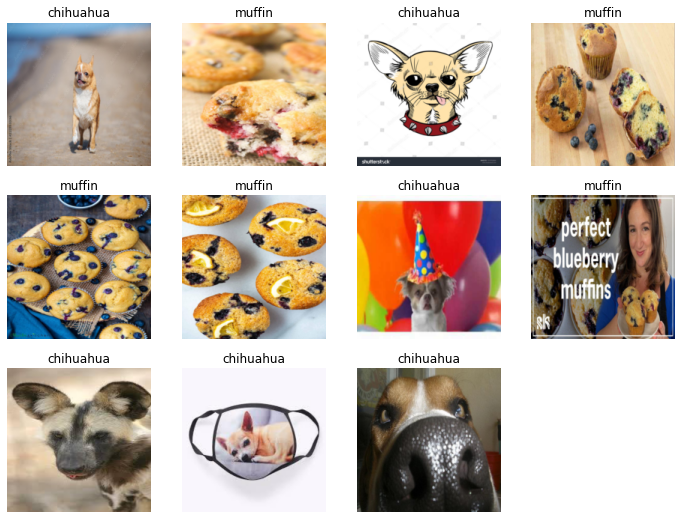

In [10]:
dls.show_batch(max_n=11)


In [11]:
# learner (dataLoader, model, show the error_rate)
learn = vision_learner(dls, resnet18, metrics=error_rate)
print (learn)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [12]:
# fine tunning (repeat in 'parameter' times)
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.175543,0.046260,0.014799,01:30


epoch,train_loss,valid_loss,error_rate,time
0,0.057977,0.031429,0.007400,01:21
1,0.028690,0.016798,0.007400,01:21


In [13]:
# gets validation images
validation_files = get_image_files(validation_path)

In [14]:
# validation file check
val_image = PILImage.create(validation_files[2])

In [15]:
is_chihuaua,_,probs = learn.predict(val_image)


In [16]:
is_chihuahua,_,probs = learn.predict('/kaggle/input/muffin-vs-chihuahua-image-classification/test/chihuahua/img_0_329.jpg')

In [17]:
print(f'This is a : {is_chihuahua}.')
print(f'Probability of this being a muffin is : {probs[0]:4f}.')

This is a : chihuahua.
Probability of this being a muffin is : 1.000000.


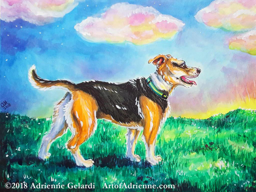

In [18]:
imgg = PILImage.create('../input/muffin-vs-chihuahua-image-classification/test/chihuahua/img_0_329.jpg')
imgg.to_thumb(256)